
# Project: An Investigation of Medical Appointments No-shows

### Submitted by: Ahmed Mohamed Hussein Unshur




_____________________________________________________________________________________________________
## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#references">References</a></li>

<a id='intro'></a>
## 1. Introduction

This project investigates medical appointments no-shows in Brazil. The project uses data from 100K appointments and its original source is available on [Kaggle](https://www.kaggle.com/datasets/joniarroba/noshowappointments). 

**Specifically, the project tries to answer the following questions:**

1. Does the gender of patients play a role in whether they don't show up for appointments?
2. Does the age of patients play a role in whether they don't show up for appointments?
3. Does not receiving reminder SMS messages play a role in missing appointments?

The project is descriptive in nature and was completed as part of Udacity's [Data Analyst Nanodegree](https://www.udacity.com/course/data-analyst-nanodegree--nd002) program.

<a id='wrangling'></a>
## 2. Data Wrangling

In this section, we will conduct data wrangling and cleaning with the aim to prepare data for analysis.

There are a number of python packages for data analysis that are required for the investigation in this project.

The following code imports Numpy, Pandas, Matplotlib, and Seaborn packages.

In [2]:
# import required packages for data analysis and visualization.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# enable inline plotting.
%matplotlib inline

# set seaborn's default theme.
sns.set_theme()

### 2.1. General Properties and Data Cleaning

In [3]:
# load dataset.
df = pd.read_csv('noshow_dataset.csv')

The above code loads the dataset file *'noshow_dataset.csv'* into the Jupyter Notebook.

In [4]:
# view the first 10 rows of the dataset.
df.head(10)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,9.598513e+13,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,No
6,7.336882e+14,5630279,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,3.449833e+12,5630575,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,Yes
8,5.639473e+13,5638447,F,2016-04-29T08:02:16Z,2016-04-29T00:00:00Z,21,ANDORINHAS,0,0,0,0,0,0,No
9,7.812456e+13,5629123,F,2016-04-27T12:48:25Z,2016-04-29T00:00:00Z,19,CONQUISTA,0,0,0,0,0,0,No


In [5]:
# view the last 10 rows of the dataset.
df.tail(10)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
110517,5.574942e+12,5780122,F,2016-06-07T07:38:34Z,2016-06-07T00:00:00Z,19,MARIA ORTIZ,0,0,0,0,0,0,No
110518,7.263315e+13,5630375,F,2016-04-27T15:15:06Z,2016-06-07T00:00:00Z,50,MARIA ORTIZ,0,0,0,0,0,1,No
110519,6.542388e+13,5630447,F,2016-04-27T15:23:14Z,2016-06-07T00:00:00Z,22,MARIA ORTIZ,0,0,0,0,0,1,No
110520,9.969977e+14,5650534,F,2016-05-03T07:51:47Z,2016-06-07T00:00:00Z,42,MARIA ORTIZ,0,0,0,0,0,1,No
110521,3.635534e+13,5651072,F,2016-05-03T08:23:40Z,2016-06-07T00:00:00Z,53,MARIA ORTIZ,0,0,0,0,0,1,No
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No
110526,3.775115e+14,5629448,F,2016-04-27T13:30:56Z,2016-06-07T00:00:00Z,54,MARIA ORTIZ,0,0,0,0,0,1,No


In [6]:
# show number of rows and columns within the dataset.
df.shape

(110527, 14)

In [7]:
# show concise summary of the dataframe.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


The dataset consists of **110527** rows and **14** columns.

Excluding the index column, the first 13 columns describe features related to patients, and the last column whether they showed up for their appointments or not. Features in the first 13 columns are the following:
1. Patient ID
2. Appointment ID
3. Gender
4. Scheduled Day
5. Appointment Day
6. Age
7. Neighbourhood
8. Scholarship
9. Hypertension
10. Diabetes
11. Alcoholism
12. Handcap
13. SMS Received

Based on the summary of the dataframe, it appears that there are no missing values in the dataset.

Data type for the ScheduledDay and AppointmentDay columns should be *datetime* instead of *object*, so we need to change datatype of both columns.

In [8]:
# change datatype of ScheduledDay and AppointmentDay columns into datatime.
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

# check if changing happened correctly.
df.ScheduledDay.dtypes, df.AppointmentDay.dtypes

(datetime64[ns, UTC], datetime64[ns, UTC])

Datatype of both columns were changed correctly.

In [9]:
# show duplicates in the dataset.
sum(df.duplicated())

0

There are no two identical rows in the dataset.

Now, we will search if there are identical Appointment IDs.

In [10]:
# show duplicates in the AppointmentID column.
df.AppointmentID.duplicated().sum()

0

There are no duplicates in the Appointment ID column.

### 2.2. Target Variables Data Cleaning.

In this section, we will select and clean only the following columns: ***gender, age, SMS_received, and no-show***.

This is becuase we are interested in whether showing or not showing up for appointments is associated with (1) patient's gender, (2) age, and (3) the SMS messages they received.

Now, we will drop all columns except the ones mentioned above.

In [11]:
# drop columns.
df.drop(['PatientId', 'AppointmentID', 'ScheduledDay', 'AppointmentDay', 'Neighbourhood',
         'Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap'], axis=1, inplace=True)

In [12]:
# Check structure of new dataframe.
df.head()

,Gender,Age,SMS_received,No-show
0,F,62,0,No
1,M,56,0,No
2,F,62,0,No
3,F,8,0,No
4,F,56,0,No


We will change naming of the two categories in the ***gender*** column.

In [13]:
# change category codes in the gender column from F and M to Female and Male respectively.
df['Gender'].replace('F', 'Female', inplace=True)
df['Gender'].replace('M', 'Male', inplace=True)

# check if replacing occured correctly.
print(df['Gender'])

0         Female
1           Male
2         Female
3         Female
4         Female
           ...  
110522    Female
110523    Female
110524    Female
110525    Female
110526    Female
Name: Gender, Length: 110527, dtype: object


In [14]:
# show number of females and males.
df.Gender.value_counts()

Female    71840
Male      38687
Name: Gender, dtype: int64

In [15]:
# define function that plots pie chart.
def plot_pie_chart(df):
    df.value_counts().plot(kind='pie', autopct='%1.0f%%', labels=None, legend=True)
    plt.tight_layout()
    plt.axis('equal')
    plt.ylabel('') 
    plt.xlabel('')
    return 

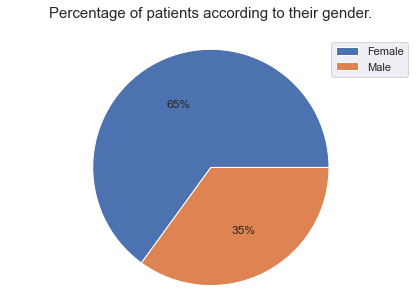

In [16]:
# visualize percentage of females and males using pie chart.
plot_pie_chart(df['Gender'])
plt.title('Percentage of patients according to their gender.', size=15, y=1.05)
plt.show()

Number of females in more than that of males, where the number of females is **71840 (65%)** and the number of males is **38687 (35%)**.

Now, we will investigate the ***age*** column.

In [17]:
# show descriptive statistics of age variable. 
df.Age.describe()

count    110527.000000
mean         37.088874
std          23.110205
min          -1.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

Based on the descriptive statistics, we can see that the average of patients is 37 years. The minimum age is -1  and the maximum is 115. This requires further investigation.

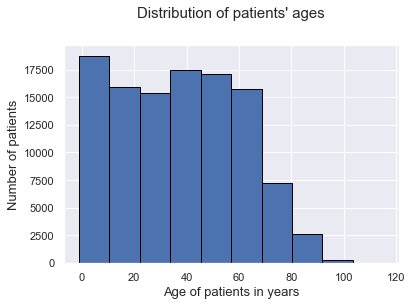

In [18]:
# plot histogram for age variable.
df.Age.plot(kind='hist', edgecolor='black')
plt.title('Distribution of patients\' ages',  size=15, y=1.1)
plt.xlabel('Age of patients in years', size=13)
plt.ylabel('Number of patients', size=13)
plt.show()

The histogram shows that number of younger patients is greater than that of elder ones.

In [19]:
# view rows with age < 0.
df.query('Age < 0')

,Gender,Age,SMS_received,No-show
99832,Female,-1,0,No


There is only patient with age of -1 which is an error since a person can't have an age of less than Zero. So, we will remove the row.

In [20]:
# drop row with age < 0.
df.drop(df.query('Age < 0').index, inplace=True)

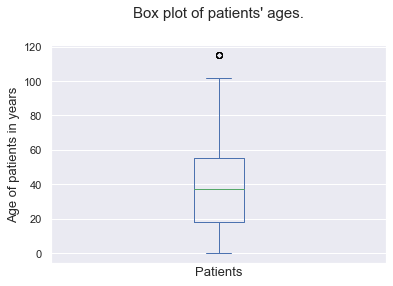

In [21]:
# visualize box plot for age variable.
df.Age.plot(kind = 'box')
plt.title('Box plot of patients\' ages.', size=15, y=1.1)
plt.xlabel('Patients', size=13)
plt.ylabel('Age of patients in years', size=13)
plt.xticks([])
plt.yticks()
plt.show()

    The box plot shows outliers in the upper tail of the age distribution.
    
    The following code queries ages greater than 100.

In [22]:
# veiw rows with age > 100.
df.query('Age > 100')

,Gender,Age,SMS_received,No-show
58014,Female,102,0,No
63912,Female,115,0,Yes
63915,Female,115,0,Yes
68127,Female,115,0,Yes
76284,Female,115,0,No
90372,Female,102,0,No
97666,Female,115,1,No


The table shows seven female patients with age above 100. Although data might be correct, but we will drop the seven cases to get rid of outliers.

In [23]:
# drop row with age > 100.
df.drop(df.query('Age > 100').index, inplace=True)

Now, we will investigate the ***SMS_received*** column.

In [24]:
# show minimum and maximum values in SMS_received variable.
df.SMS_received.min(), df.SMS_received.max(),

(0, 1)

In [25]:
# change category codes in the SMS_received column from 0 and 1 to No and Yes respectively.
df['SMS_received'].replace(0, 'Not received', inplace=True)
df['SMS_received'].replace(1, 'Received', inplace=True)

In [26]:
# show number of patients received SMS messages and those who didn't.
df.SMS_received.value_counts()

Not received    75038
Received        35481
Name: SMS_received, dtype: int64

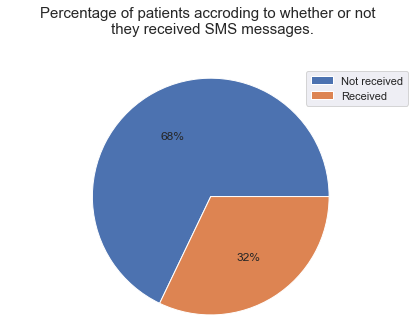

In [27]:
plot_pie_chart(df['SMS_received'])
plt.title('Percentage of patients accroding to whether or not \n they received SMS messages.', size=15, y=1.1)
plt.show()

Number of patients received SMS messages is less than that of those who didn't receive SMS messages, where the number of those received is **35481 (32%)** and those who didn't **75038 (68%)**.

And now, we investigate the ***No-show*** column.

In [28]:
# show number of patients that showed up for appointments and those that didn't.
df['No-show'].value_counts()

No     88203
Yes    22316
Name: No-show, dtype: int64

In [29]:
# change category codes in the No-show column from No and Yes to Showed up and Did not show up respectively.
df['No-show'].replace('No', 'Showed up', inplace=True)
df['No-show'].replace('Yes', 'Did not show up', inplace=True)

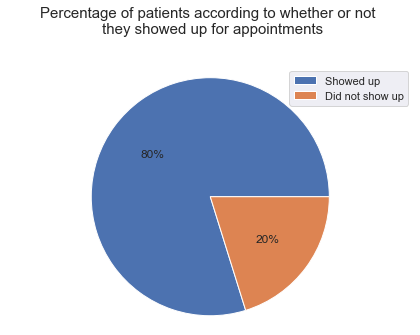

In [30]:
plot_pie_chart(df['No-show'])
plt.title('Percentage of patients according to whether or not \n they showed up for appointments', size=15, y=1.1)
plt.show()

Number of patients that showed up for their appointments is more than that of those who didn't, where the number of those showed up is **88203 (80%)** and those who didn't **22316 (20%)**.

In [31]:
# show concise summary of the dataframe.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110519 entries, 0 to 110526
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   Gender        110519 non-null  object
 1   Age           110519 non-null  int64 
 2   SMS_received  110519 non-null  object
 3   No-show       110519 non-null  object
dtypes: int64(1), object(3)
memory usage: 4.2+ MB


The final dataframe that we will be using for our analysis consists of **110519** rows and **4** columns (Gender, Age, SMS_received, and No-show).

We will use *no-show* as our dependent variable, and *gender, age, and SMS_received* as our independent variables.

Now that we finished the general probing and cleaning of data of the variables we're interested in our investigation, we will start the exploratory data analysis (EDA).

<a id='eda'></a>
## 3. Exploratory Data Analysis

In this section, we will conduct exploratory data analysis to address questions we posed in the Introduction section.

#### 3.1. Question 1: Does the gender of patients play a role in whether they don't show up for appointments?


In [32]:
# view number of females and males that showed up for appointments and those who didn't.
df.groupby(['Gender', 'No-show'])['No-show'].count()

Gender  No-show        
Female  Did not show up    14591
        Showed up          57241
Male    Did not show up     7725
        Showed up          30962
Name: No-show, dtype: int64

Number of female patients that didn't show up for their appointments was 14591, whereas that of male patients reached 7725.

In contrast, the number of female and male patients that showed up for appointments was 57241 and 30962, respectively.

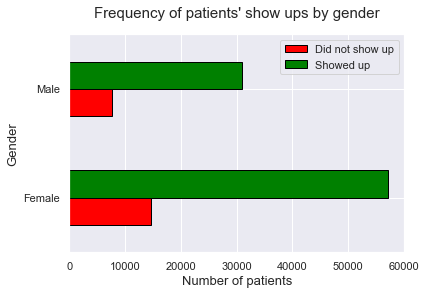

In [33]:
# visualize appointment show ups count for males and females.
bars = df.groupby(['Gender', 'No-show'])['No-show'].count()
bars.unstack().plot(kind='barh', color=['Red', 'Green'], edgecolor='black')
plt.title('Frequency of patients\' show ups by gender', size=15, y=1.05)
plt.xlabel('Number of patients', size=13)
plt.ylabel('Gender', size=13) 
plt.legend(loc='upper right')
plt.show()  

The bar graph above illustrates appointment show ups count differences according to gender of patients. 

We can see from the graph that more females missed their appointments than males, but at the same time more females showed up than males. One reason for this could be the large number of females in the dataset. That being said, we can see from the graph that the ratio of females patients to their male counterparts in showing and not showing up for appointments seems to be the same.


#### 3.2. Question 2: Does the age of patients play a role in whether they don't show up for appointments?

In [34]:
# use masks to create two dataframes, one for patients that showed up for appointments and the other for those who didn't.
showed = df[df['No-show'] == 'Showed up']
not_showed = df[df['No-show'] == 'Did not show up']

In [35]:
# view age descriptive statistics of patients that showed up for appointments and those who didn't.
not_showed['Age'].describe(), showed['Age'].describe()

(count    22316.000000
 mean        34.306820
 std         21.947486
 min          0.000000
 25%         16.000000
 50%         33.000000
 75%         51.000000
 max         98.000000
 Name: Age, dtype: float64,
 count    88203.000000
 mean        37.787297
 std         23.334275
 min          0.000000
 25%         18.000000
 50%         38.000000
 75%         56.000000
 max        100.000000
 Name: Age, dtype: float64)

We can see from the desciptive statistics above that the mean age of patients that didn't show for their appointments is 34.3 years, while that of those showed up is 37.8 years.

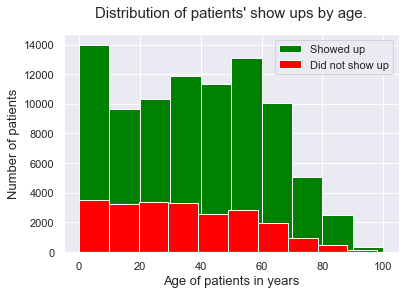

In [36]:
# visualize age distribution of patients that showed up for appointment and those who didn't.
plt.figure(figsize=(6, 4))
plt.hist(showed['Age'], label='Showed up', color='Green')
plt.hist(not_showed['Age'], label='Did not show up', color='Red')
plt.title('Distribution of patients\' show ups by age.',  size=15, y=1.05)
plt.xlabel('Age of patients in years', size=13)
plt.ylabel('Number of patients', size=13)
plt.legend(loc='upper right')
plt.show() 

The histogram above indicates that patients under 40 years tend to not show up more for medical appointments compared to senior patients.  

#### 3.3. Question 3: Does not receiving reminder SMS messages play a role in missing appointments?

In [37]:
# view number show ups count for patients received SMS messsages and those who didn't.
df.groupby('SMS_received')['No-show'].value_counts()

SMS_received  No-show        
Not received  Showed up          62506
              Did not show up    12532
Received      Showed up          25697
              Did not show up     9784
Name: No-show, dtype: int64

Number of patients not received SMS messages and missed their appointments was 12532, while that of those didn't receive messages and showed up for appointments was 62506.

On the other hand, the number of patients that recieved messages and missed appointments was 9784, whereas that of those showed up for appointments was 25697.

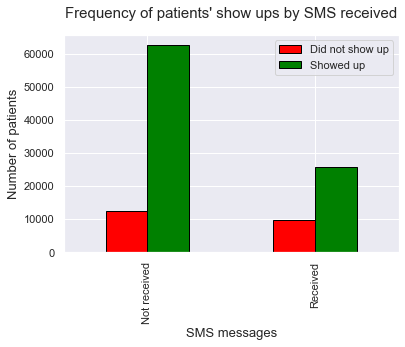

In [38]:
# visualize appointment show ups count for patients received SMS messsages and those who didn't.
bars = df.groupby(['SMS_received', 'No-show'])['No-show'].count()
bars.unstack().plot(kind='bar', color=['Red', 'Green'], edgecolor='black')
plt.title('Frequency of patients\' show ups by SMS received', size=15, y=1.05)
plt.xlabel('SMS messages', size=13)
plt.ylabel('Number of patients', size=13) 
plt.legend(loc='upper right')
plt.show()

Based on the visual above, we can see that most of the patients didn't receive reminder SMS messages, and not receiving reminder SMS messages doesn't play a big role in not showing up for appointments. Suprisingly, patients that didn't receive messages showed up for appointments more compared to those who did.

<a id='conclusions'></a>
## 4. Conclusions

In this project, we probed medical appointment no shows dataset available on [Kaggle](https://www.kaggle.com/datasets/joniarroba/noshowappointments). In particular, we investigated the role of gender, age, and reminder SMS messages received on patient no shows. After wrangling and exploring the data, we have reached the following results:



1. Percentage of patients that didn't show up for their medical appointments was 20%, whereas that of those who did represented to 80%.
2. Percentage of female patients represented to 65%% , and that of males 35%. Gender doesn't play a role in appointment no shows.
3. Average age of patients was 37 years, and younger patients tend to not show up for appointments compared to senior patients.
4. Percentage of patients that didn't receive reminder SMS messages was 68%, while that of those who did represented to 32%. Patients that received messages missed appointment more than those who didn't.



A limitation of this project is that its descriptive and explanatory, and becuase of that we cannot make causal inferences. Further investigation is required.

<a id='references'></a>
## References

1. https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.pie.html

2. https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.ylabel.html

3. https://matplotlib.org/stable/gallery/text_labels_and_annotations/titles_demo.html

4. https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.barh.html#matplotlib.pyplot.barh

5. https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.figure.html

6. https://towardsdatascience.com/an-easy-way-to-replace-values-in-a-pandas-dataframe-2826bd34e59a

7. https://www.w3schools.io/file/markdown-links/

8. https://deepnote.com/@toby-roth-ca1b/SI-330-80855b36-5a78-484a-9114-cc00e9bd86c8

9. https://seaborn.pydata.org/generated/seaborn.set_theme.html

10. https://pyam-iamc.readthedocs.io/en/v0.9.0/examples/plot_pie.html






